In this section we try to perform Sentiment Analysis using VADER methods. One of the reasons that we have chosen VADER is that VADER is one method that works best for social media text. VADER performs well with emojis, slang and acronym sentences. For each text line we fet a positive, negative, neutral and compound score. The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardized to range between -1 and 1 based on some heuristics. 

Here we only use the compound score. Compound score can be used to label a text as positive, negative or neutral according to the following compound score metric-
Positive Sentiment: compound score >= 0.05
Neutral Sentiment: (compound score > -0.05) and (compound score < 0.05)
Negative Sentiment: (compound score <= -0.05)

Firstly, we perform sentiment analysis using VADER methods for the Twiter data for i phonex and see the sentiment frequency distribition bar plot and pie charts


C:\Users\Gaurav\Anaconda3_New\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Gaurav\Anaconda3_New\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


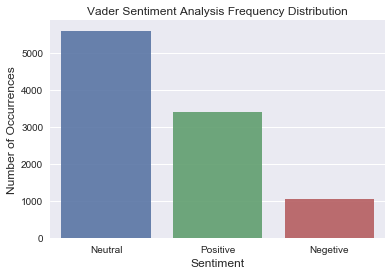

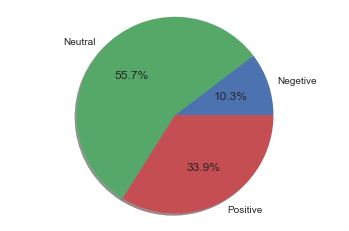

Secondly, we perform sentiment analysis using VADER methods for the Twitter data for i phonexr and see the sentiment frequency distribition bar plot and pie charts


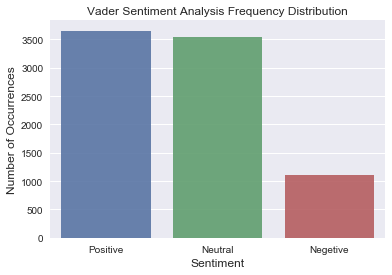

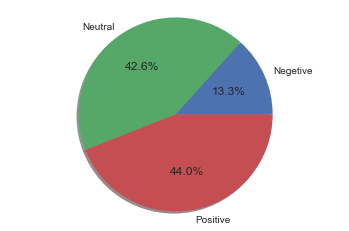

Lastly, we perform sentiment analysis using VADER methods for the Twitter data for i phonexs and see the sentiment frequency distribition bar plot and pie charts


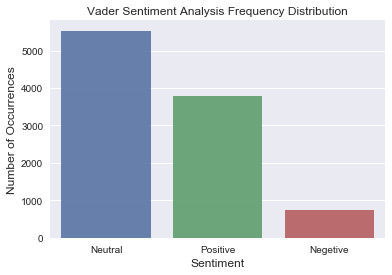

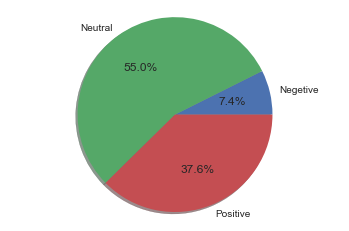

In [12]:
#getting all the imports together
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from nltk.corpus import wordnet as wn
import pandas as pd
import numpy as np 
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

def vader_sentiment_analysis(filename):
    #firstly, we create a new dataframe for reading the csv data
    df_data = pd.read_csv(filename)
    #create a new column which have the compound scores of all the rows(texts)
    sid = SentimentIntensityAnalyzer()
    #creating a new pandas column
    df_data['vader_compound_score'] = ""
    df_data['Sentiment'] = ""
    for index, row in df_data.iterrows():
            compound_score = sid.polarity_scores(df_data.text[index])['compound'] 
            df_data.vader_compound_score[index] = compound_score
            if (compound_score >= 0.05):
                sentiment = "Positive"
            elif (compound_score > -0.05 and compound_score < 0.05):
                sentiment = "Neutral"
            elif (compound_score <= -0.05):
                sentiment = "Negetive"
            df_data['Sentiment'][index] = sentiment

    # we try to get a frequency distribution bar plot here
    count = df_data['Sentiment'].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Vader Sentiment Analysis Frequency Distribution')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Sentiment', fontsize=12)
    plt.show()

    # here we get a pie chart for the frequency distribution of positive , negetive and neutral sentiment
    labels = df_data['Sentiment'].astype('category').cat.categories.tolist()
    counts = df_data['Sentiment'].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.show()

if __name__=="__main__":
    #firstly we change the working directory to easily access the file 
    os.chdir("C://Gaurav/Study/Semester 3/Web Mining/Web Mining Project/latest data/data")
    print("Firstly, we perform sentiment analysis using VADER methods for the Twiter data for i phonex and see the sentiment frequency distribition bar plot and pie charts")
    vader_sentiment_analysis(filename = 'iPhonex_twitter_eda.csv')
    print("Secondly, we perform sentiment analysis using VADER methods for the Twitter data for i phonexr and see the sentiment frequency distribition bar plot and pie charts")
    vader_sentiment_analysis(filename = 'iPhoneXR_twitter_eda.csv')
    print("Lastly, we perform sentiment analysis using VADER methods for the Twitter data for i phonexs and see the sentiment frequency distribition bar plot and pie charts")
    vader_sentiment_analysis(filename = 'iPhoneXS_twitter_eda.csv')
        